In [809]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# ignore all FutureWarnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [810]:
# indices en la primera columna
datos_procesados = pd.read_csv('train_procesada.csv', sep=',', encoding='utf-8', index_col=0)
datos_procesados.head()
datos_procesados.reset_index(drop=True, inplace=True)

Media: 3278.426389136121


Text(0.5, 1.0, 'Depressive disorder rates (number suffering per 100,000)')

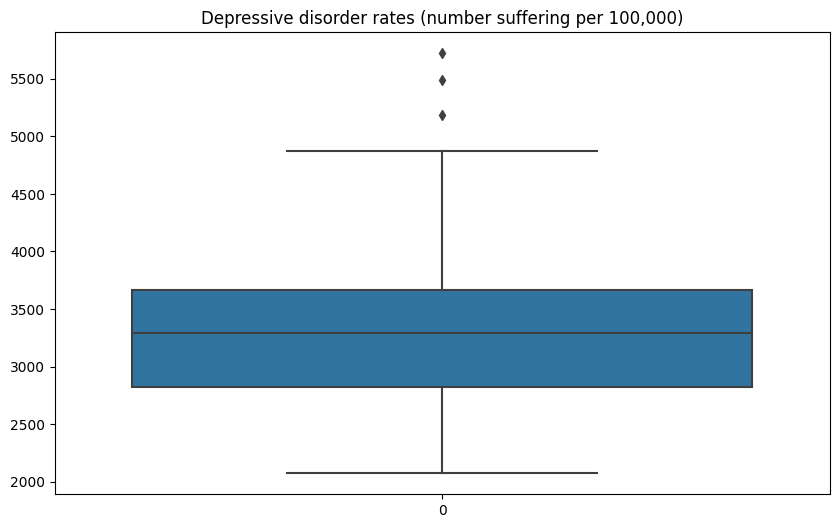

In [811]:
#sacar la media, hacer caja de bigotes de 'Depressive disorder rates (number suffering per 100,000)'

mean = datos_procesados['Depressive disorder rates (number suffering per 100,000)'].mean()
print (f'Media: {mean}')

plt.figure(figsize=(10,6))
sns.boxplot(datos_procesados['Depressive disorder rates (number suffering per 100,000)'])
plt.title('Depressive disorder rates (number suffering per 100,000)')

In [812]:
bajo = 2800
alto = 3800
datos_procesados['Depression_binary'] = np.where(datos_procesados['Depressive disorder rates (number suffering per 100,000)'] > alto, 2 , np.where(datos_procesados['Depressive disorder rates (number suffering per 100,000)'] > bajo, 1, 0)) 
datos_procesados.head()

,Entity,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%),...,10-14 years old (%),All ages (%),70+ years old (%),30-34 years old (%),15-19 years old (%),25-29 years old (%),50-69 years old (%),Age-standardized (%),15-49 years old (%),Depression_binary
0,Afghanistan,AFG,2017,0.166158,0.708089,0.107142,4.882481,2.473934,4.136347,0.661217,...,1.618270,3.050785,5.279772,5.749905,3.433750,5.105028,6.131183,4.136347,5.010372,2
1,Albania,ALB,2017,0.201025,0.704480,0.174046,3.385245,0.517614,2.208414,1.837955,...,0.900396,2.607896,4.399558,2.401418,2.004014,2.398396,3.664052,2.208414,2.487747,0
2,Algeria,DZA,2017,0.197913,0.818687,0.213612,5.065876,1.717218,3.661094,0.665191,...,1.757578,3.691020,4.848270,4.630534,3.404122,4.256386,5.402483,3.661094,4.522808,1
3,American Samoa,ASM,2017,0.248557,0.468305,0.177808,3.315834,0.772801,2.939668,1.142277,...,1.063623,2.787788,5.746022,2.971754,2.438167,2.862544,5.451378,2.939668,3.115501,1
4,Andorra,AND,2017,0.263512,0.963331,0.644559,5.305375,0.910066,3.729532,1.256050,...,1.823388,4.372485,4.827994,4.862243,3.507257,4.627740,4.882617,3.729532,4.805177,1


In [813]:
print(datos_procesados['Depression_binary'].value_counts())

Depression_binary
1    115
0     47
2     34
Name: count, dtype: int64


In [814]:
#standar scaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
datos_procesados_scaled = datos_procesados.copy()
datos_procesados_scaled.drop(columns=['Entity'], inplace=True)

columnas_a_escalar = datos_procesados_scaled.columns.difference(['Code', 'Depression_binary'])

datos_procesados_scaled[columnas_a_escalar] = scaler.fit_transform(datos_procesados_scaled[columnas_a_escalar])

datos_procesados_scaled.head()


,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%),Prevalence in males (%),...,10-14 years old (%),All ages (%),70+ years old (%),30-34 years old (%),15-19 years old (%),25-29 years old (%),50-69 years old (%),Age-standardized (%),15-49 years old (%),Depression_binary
0,AFG,0.0,-1.091458,-0.076005,-0.916080,0.816580,3.270423,1.086546,-1.087872,1.476056,...,0.578240,-0.435228,-0.520671,1.798157,0.477808,1.330767,0.556811,1.086546,1.126474,2
1,ALB,0.0,-0.246306,-0.098029,-0.504432,-0.512855,-0.725162,-1.910020,0.325823,-2.112716,...,-1.208523,-0.985890,-1.109369,-1.566637,-1.220435,-1.411772,-1.914183,-1.910020,-1.560442,0
2,DZA,0.0,-0.321745,0.598897,-0.260987,0.979421,1.724908,0.347866,-1.083099,0.349136,...,0.924971,0.360801,-0.809265,0.673334,0.442616,0.470866,-0.173030,0.347866,0.607157,1
3,ASM,0.0,0.905796,-1.539234,-0.481288,-0.574487,-0.203968,-0.773440,-0.509943,-0.616332,...,-0.802256,-0.762223,-0.208837,-0.993524,-0.704747,-0.941467,-0.124058,-0.773440,-0.891804,1
4,AND,0.0,1.268308,1.481556,2.390558,1.192078,0.076381,0.454237,-0.373259,-0.001376,...,1.088769,1.208092,-0.822826,0.906172,0.565120,0.847147,-0.693710,0.454237,0.907916,1


In [815]:
qualitative_columns = ['Code']

In [816]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

# LabelEncoder para las columnas cualitativas
label_encoder = LabelEncoder()

for column in qualitative_columns:
    datos_procesados_scaled[column] = label_encoder.fit_transform(datos_procesados_scaled[column])

datos_procesados_scaled.head()
datos_procesados_ecoding = datos_procesados_scaled.copy()
datos_procesados_ecoding.head()

,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%),Prevalence in males (%),...,10-14 years old (%),All ages (%),70+ years old (%),30-34 years old (%),15-19 years old (%),25-29 years old (%),50-69 years old (%),Age-standardized (%),15-49 years old (%),Depression_binary
0,0,0.0,-1.091458,-0.076005,-0.916080,0.816580,3.270423,1.086546,-1.087872,1.476056,...,0.578240,-0.435228,-0.520671,1.798157,0.477808,1.330767,0.556811,1.086546,1.126474,2
1,2,0.0,-0.246306,-0.098029,-0.504432,-0.512855,-0.725162,-1.910020,0.325823,-2.112716,...,-1.208523,-0.985890,-1.109369,-1.566637,-1.220435,-1.411772,-1.914183,-1.910020,-1.560442,0
2,51,0.0,-0.321745,0.598897,-0.260987,0.979421,1.724908,0.347866,-1.083099,0.349136,...,0.924971,0.360801,-0.809265,0.673334,0.442616,0.470866,-0.173030,0.347866,0.607157,1
3,7,0.0,0.905796,-1.539234,-0.481288,-0.574487,-0.203968,-0.773440,-0.509943,-0.616332,...,-0.802256,-0.762223,-0.208837,-0.993524,-0.704747,-0.941467,-0.124058,-0.773440,-0.891804,1
4,3,0.0,1.268308,1.481556,2.390558,1.192078,0.076381,0.454237,-0.373259,-0.001376,...,1.088769,1.208092,-0.822826,0.906172,0.565120,0.847147,-0.693710,0.454237,0.907916,1


In [817]:
X = datos_procesados_ecoding.drop(columns=["Depression_binary", "Depressive disorder rates (number suffering per 100,000)"])
y = datos_procesados_ecoding["Depression_binary"]

In [818]:
from sklearn.model_selection import train_test_split

In [819]:
X_entreno, X_prueba, y_entreno, y_prueba = train_test_split(X, y, test_size=0.3, random_state=0)

In [820]:
y_prueba

83     2
12     0
33     2
113    1
171    0
134    1
163    1
124    0
74     2
18     0
7      1
5      2
125    1
161    1
170    0
181    2
123    1
60     2
44     1
141    1
56     1
173    1
136    0
89     1
63     2
55     2
110    1
166    2
175    1
45     1
22     1
155    0
66     1
37     1
4      1
80     0
178    1
106    1
160    1
26     0
139    2
143    1
71     1
8      0
61     2
130    1
122    1
101    1
118    2
92     1
185    2
24     2
30     1
109    1
40     2
137    0
150    1
90     1
19     1
Name: Depression_binary, dtype: int64

In [821]:
X_entreno.isna().sum()


Code                                                                                                         0
Year                                                                                                         0
Schizophrenia (%)                                                                                            0
Bipolar disorder (%)                                                                                         0
Eating disorders (%)                                                                                         0
Anxiety disorders (%)                                                                                        0
Drug use disorders (%)                                                                                       0
Depression (%)                                                                                               0
Alcohol use disorders (%)                                                                                    0
P

In [822]:
from sklearn.svm import SVC
clasificador = SVC(kernel = 'linear', random_state = 0)
clasificador.fit(X_entreno, y_entreno)

SVC(kernel='linear', random_state=0)

In [823]:
y_pred = clasificador.predict(X_prueba)

In [824]:
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_prueba.values.reshape(len(y_prueba),1)),1))

[[2 2]
 [0 0]
 [2 2]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [2 2]
 [1 0]
 [1 1]
 [2 2]
 [1 1]
 [1 1]
 [1 0]
 [2 2]
 [1 1]
 [2 2]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [2 2]
 [2 2]
 [1 1]
 [2 2]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [2 2]
 [1 1]
 [1 1]
 [0 0]
 [1 2]
 [1 1]
 [1 1]
 [1 1]
 [2 2]
 [1 1]
 [2 2]
 [1 2]
 [1 1]
 [1 1]
 [2 2]
 [0 0]
 [1 1]
 [1 1]
 [1 1]]


In [825]:
from sklearn.metrics import confusion_matrix, accuracy_score
mat_conf = confusion_matrix(y_prueba, y_pred)
print(mat_conf)
accuracy_score(y_prueba, y_pred)

[[ 9  2  0]
 [ 0 33  0]
 [ 0  2 13]]


0.9322033898305084